http://ned.ipac.caltech.edu/level5/March19/Baron/Baron2.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

## Create our own labels:
    - Random empty spot as noise
    
## Use entire spectrum and not encoded.

* Extracted entire noise spectrum. 

* Combine the high confidence and noise array. Here are the labels for it. 

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [ ]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

# Use autoencoder to decode my data.

In [ ]:
plt.plot(random_highz_sources[91])

In [3]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_1000.npy", allow_pickle = True)

In [20]:
high_confidence_highz_spectra.shape

(1000, 1036)

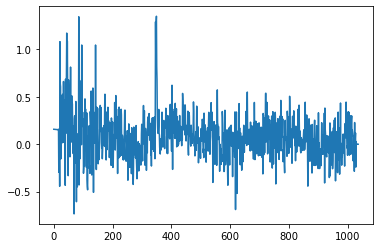

In [4]:
plt.plot(high_confidence_highz_spectra[100])

In [5]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_1000.npy", allow_pickle = True)

In [34]:
noise_sample

array([[-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
         0.05123827,  0.05123386],
       [ 0.107195  ,  0.10851217,  0.10982789, ...,  0.14232644,
         0.14230387,  0.14228151],
       [-0.06730778, -0.06700857, -0.06670939, ..., -0.06052472,
        -0.06053803, -0.06055122],
       ...,
       [-0.55389851, -0.55327332, -0.5526465 , ...,  0.04016945,
         0.04015587,  0.04014242],
       [ 0.19034464,  0.18940234,  0.18845793, ...,  0.48314523,
         0.48315916,  0.48317293],
       [ 1.20482559,  1.20504015,  1.2052516 , ...,  0.24669444,
         0.2467046 ,  0.24671464]])

In [21]:
noise_sample.shape

(1000, 1036)

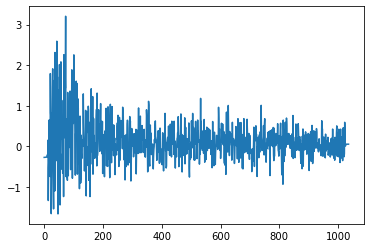

In [6]:
plt.plot(noise_sample[0])

In [75]:
noise_sample.shape

(1000, 1036)

In [120]:
df = pd.DataFrame(columns=[1, 2])
#df[1] = df[1].astype(object)
for i in range(1000):
    df.loc[i, 1] = noise_sample[i]
    df.loc[i, 2] = high_confidence_highz_spectra[i]
df

,1,2
0,"[-0.2745350651090622, -0.2737695754367118, -0....","[0.41081295627938086, 0.41056771447626034, 0.4..."
1,"[0.10719499983231176, 0.10851217425876615, 0.1...","[1.2038720574260438, 1.2035965089283491, 1.203..."
2,"[-0.06730778183374654, -0.06700857341262742, -...","[-0.3846966864195164, -0.383299771206096, -0.3..."
3,"[0.26524069710086234, 0.2641567780718815, 0.26...","[0.30983761383520153, 0.3103446243530814, 0.31..."
4,"[0.22173403554036744, 0.22058522042018333, 0.2...","[0.9560510273906166, 0.9591930732620303, 0.962..."
...,...,...
995,"[-0.9745579263840072, -0.9743290107782245, -0....","[0.03439495327132092, 0.03404298865517989, 0.0..."
996,"[0.651170647027954, 0.6509386707244421, 0.6507...","[0.026277668678197825, 0.02663091187239326, 0...."
997,"[-0.5538985072952052, -0.5532733222073725, -0....","[-0.3130105874134315, -0.31306856269327893, -0..."
998,"[0.19034463588101694, 0.1894023417498457, 0.18...","[1.001519775442492, 1.001469975314998, 1.00141..."


In [131]:
df.columns = ["noise", "confident-highz"]

In [132]:
df

,noise,confident-highz
0,"[-0.2745350651090622, -0.2737695754367118, -0....","[0.41081295627938086, 0.41056771447626034, 0.4..."
1,"[0.10719499983231176, 0.10851217425876615, 0.1...","[1.2038720574260438, 1.2035965089283491, 1.203..."
2,"[-0.06730778183374654, -0.06700857341262742, -...","[-0.3846966864195164, -0.383299771206096, -0.3..."
3,"[0.26524069710086234, 0.2641567780718815, 0.26...","[0.30983761383520153, 0.3103446243530814, 0.31..."
4,"[0.22173403554036744, 0.22058522042018333, 0.2...","[0.9560510273906166, 0.9591930732620303, 0.962..."
...,...,...
995,"[-0.9745579263840072, -0.9743290107782245, -0....","[0.03439495327132092, 0.03404298865517989, 0.0..."
996,"[0.651170647027954, 0.6509386707244421, 0.6507...","[0.026277668678197825, 0.02663091187239326, 0...."
997,"[-0.5538985072952052, -0.5532733222073725, -0....","[-0.3130105874134315, -0.31306856269327893, -0..."
998,"[0.19034463588101694, 0.1894023417498457, 0.18...","[1.001519775442492, 1.001469975314998, 1.00141..."


In [144]:
df['confident-highz']

0      [0.41081295627938086, 0.41056771447626034, 0.4...
1      [1.2038720574260438, 1.2035965089283491, 1.203...
2      [-0.3846966864195164, -0.383299771206096, -0.3...
3      [0.30983761383520153, 0.3103446243530814, 0.31...
4      [0.9560510273906166, 0.9591930732620303, 0.962...
                             ...                        
995    [0.03439495327132092, 0.03404298865517989, 0.0...
996    [0.026277668678197825, 0.02663091187239326, 0....
997    [-0.3130105874134315, -0.31306856269327893, -0...
998    [1.001519775442492, 1.001469975314998, 1.00141...
999    [-0.17162231379271262, -0.1709112045033402, -0...
Name: confident-highz, Length: 1000, dtype: object

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

In [233]:
noise_sample[0]

array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
        0.05123827,  0.05123386])

In [46]:
# importing required libraries 
# importing Scikit-learn library and datasets package
from sklearn import datasets  

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [234]:
df['noise'].to_numpy()

array([array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
               0.05123827,  0.05123386])                              ,
       array([0.107195  , 0.10851217, 0.10982789, ..., 0.14232644, 0.14230387,
              0.14228151])                                                    ,
       array([-0.06730778, -0.06700857, -0.06670939, ..., -0.06052472,
              -0.06053803, -0.06055122])                              ,
       array([0.2652407 , 0.26415678, 0.26307351, ..., 0.30739685, 0.30738264,
              0.30736856])                                                    ,
       array([ 0.22173404,  0.22058522,  0.21943691, ..., -0.18304333,
              -0.18302945, -0.18301569])                              ,
       array([-0.39214935, -0.39180709, -0.39146418, ..., -0.00425096,
              -0.00425714, -0.00426327])                              ,
       array([-2.79890592, -2.79941353, -2.79991317, ...,  0.1929886 ,
               0.19297129,  0.19295416]

In [240]:

ts2 = df['confident-highz'].to_numpy()

In [223]:
ts = df['noise'].to_numpy()

In [238]:
noise_arr = np.vstack(ts).astype('float64')

In [257]:
noise_arr

array([[-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
         0.05123827,  0.05123386],
       [ 0.107195  ,  0.10851217,  0.10982789, ...,  0.14232644,
         0.14230387,  0.14228151],
       [-0.06730778, -0.06700857, -0.06670939, ..., -0.06052472,
        -0.06053803, -0.06055122],
       ...,
       [-0.55389851, -0.55327332, -0.5526465 , ...,  0.04016945,
         0.04015587,  0.04014242],
       [ 0.19034464,  0.18940234,  0.18845793, ...,  0.48314523,
         0.48315916,  0.48317293],
       [ 1.20482559,  1.20504015,  1.2052516 , ...,  0.24669444,
         0.2467046 ,  0.24671464]])

In [244]:
confidence_arr = np.vstack(ts2).astype('float64')

In [229]:
noize = df['noise'].to_numpy(dtype = 'float64')
confidence = df['confident-highz'].to_numpy()

ValueError: setting an array element with a sequence.

In [196]:
#oize = np.array(df['noise'], dtype = 'float64')
#confidence = df['confident-highz'].to_numpy()

In [197]:
noize

array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
        0.05123827,  0.05123386])

In [162]:
X = np.array(df['noise'], dtype = complex)

TypeError: only length-1 arrays can be converted to Python scalars

In [245]:
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(noise_arr, confidence_arr, test_size = 0.30)

In [248]:
X_train

array([[-2.74535065e-01, -2.73769575e-01, -2.73003970e-01, ...,
         5.12427289e-02,  5.12382737e-02,  5.12338607e-02],
       [ 6.74201767e+00,  6.73134551e+00,  6.72063462e+00, ...,
         3.86836047e+00,  3.86704366e+00,  3.86574027e+00],
       [ 2.62185376e+00,  2.61270861e+00,  2.60361598e+00, ...,
        -1.44556793e-02, -1.44747082e-02, -1.44935316e-02],
       ...,
       [-3.92149354e-01, -3.91807093e-01, -3.91464183e-01, ...,
        -4.25095747e-03, -4.25714292e-03, -4.26326594e-03],
       [-4.61149788e-01, -4.60802638e-01, -4.60454803e-01, ...,
         5.35467079e-03,  5.33152875e-03,  5.30862046e-03],
       [ 1.01111686e+00,  1.01122322e+00,  1.01132731e+00, ...,
        -3.90985899e-02, -3.91011884e-02, -3.91037601e-02]])

In [249]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [250]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  

In [251]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous-multioutput'

## According to internet, issues with overfitting! Possibly need more data.

https://stackoverflow.com/questions/62445343/randomforestregressor-in-sklearn-giving-negative-scores

In [203]:
# Loading the iris plants dataset (classification)
iris = datasets.load_iris()    

In [255]:
X.dtype

dtype('float64')

In [253]:

# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)
  
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [208]:
X.shape

(150, 4)

In [149]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# creating dataframe of IRIS dataset
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:, 1],
                     'petallength': iris.data[:, 2], 'petalwidth': iris.data[:, 3],
                     'species': iris.target})

In [150]:
print(data.head())

   sepallength  sepalwidth  petallength  petalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


In [259]:
X_train

array([[7.3, 2.9, 6.3, 1.8],
       [6. , 2.2, 5. , 1.5],
       [5. , 2.3, 3.3, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 2.5, 5.8, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [7.6, 3. , 6.6, 2.1],
       [5.7, 2.6, 3.5, 1. ],
       [6.5, 3. , 5.2, 2. ],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 3. , 5.8, 2.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 2.8, 5.1, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.1, 2.9, 4.7, 1.4],
       [4.7, 3.2, 1.3, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.6, 2.5, 3.9, 1.1],
       [5.5, 2.4, 3.8, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.1, 3

In [153]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)